In [8]:
import numpy as np
from tools import iterate
import matplotlib.pyplot as plt
import ipywidgets as ipy
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Leslie matrix for structural population

This file give the example of a population with 4 age classes: age 1, age 2, age 3 and age 4

The dynamics of the population can be written in matrix form:
$$
\begin{align*}
N_1(t + 1) \\ 
N_2(t + 1) \\ 
N_3(t + 1) \\ 
N_4(t + 1)
\end{align*}= 
\begin{pmatrix}
F_1 & F_2 & F_3 & F_4 \\
s_1 & 0 & 0 & 0 \\
0 & s_2 & 0 & 0 \\
0 & 0 & s_3 & 0
\end{pmatrix}
\begin{pmatrix}
N_1(t) \\ 
N_2(t) \\ 
N_3(t) \\ 
N_4(t)
\end{pmatrix}
$$
where $F_1$, $F_2$, $F_3$, and $F_4$ are the fecundity that corresponds to age class 1, 2, 3, and 4. $s_1$, $s_2$, $s_3$, are the survival rate of age class 1, 2, and 3. Since the maximum age of this population is 4, survival rate of the age class 4 is 0.

Check it your self to see if this result is correct from the matrix multiplication above
\begin{align*}
& N_1(t+1) = F_1 N_1(t) + F_2 N_2(t) + F_3 N_3(t) + F_4 N_4(t) \\
& N_2(t+1) = s_1 N_1(t) \\
& N_3(t+1) = s_2 N_2(t) \\
& N_4(t+1) = s_3 N_3(t)
\end{align*}


In the following graphs, we always assume that only individuals from age 3 and age 4 can reproduce, there fore $F_1 = F_2 = 0$

In [9]:
def structural_population(n, leslie_matrix):
    return leslie_matrix@n

In [10]:
fecundity = [0, 0, 2, 4]
s0  = [0.5, 0, 0, 0]
s1 = [0, 1, 0, 0]
s2 = [0, 0, 0.5, 0]
L_matrix = np.array([fecundity, s0, s1, s2])
init_pop = np.array([100, 0, 0, 0])
time, pop_dynamics = iterate(structural_population, init_pop, 40, cg=L_matrix)
pop_dynamics = np.array(pop_dynamics)

[Text(0, 0.5, 'Fraction of population'), Text(0.5, 0, 'Time')]

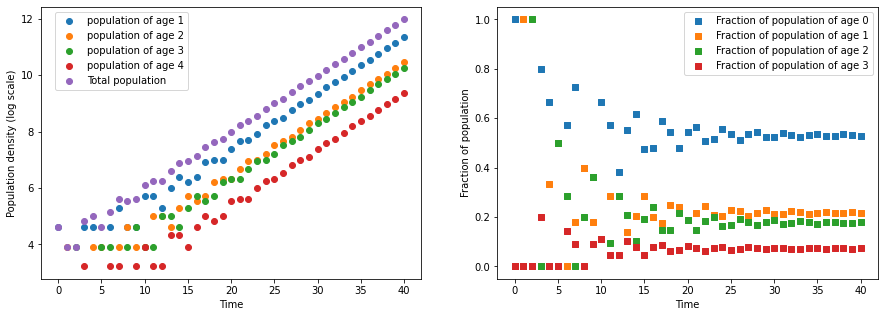

In [11]:
figure_size = (15, 5)
fig, axes = plt.subplots(1, 2, figsize=figure_size)
total_age_state = len(init_pop)
total_pop = np.sum(pop_dynamics, axis=1)
for age in range(total_age_state):
    axes[0].scatter(time, np.log(pop_dynamics[:, age]), label=f"population of age {age + 1}")
    axes[1].scatter(time, pop_dynamics[:, age]/total_pop, 
    label=f'Fraction of population of age {age}', marker='s')
axes[0].scatter(time, np.log(total_pop), 
               label="Total population")
axes[0].legend(bbox_to_anchor=(0.1, 0.6, 0.3, 0.4))
axes[1].legend(bbox_to_anchor=(0.7, 0.6, 0.3, 0.4))
axes[0].set(ylabel='Population density (log scale)', xlabel='Time')
axes[1].set(ylabel='Fraction of population', xlabel='Time')

# Percapital growth rate of the total population at each year

$$\lambda(t) = \frac{N(t)}{N(t - 1)}$$

Text(0.5, 0, 'Time')

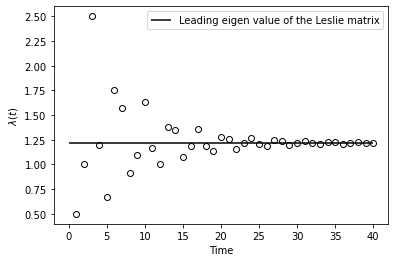

In [12]:
lbd = total_pop[1:]/total_pop[:-1]
leading_lbd = np.linalg.eigvals(L_matrix).max()
plt.scatter(time[1:], lbd, c='w', edgecolors='k')
plt.hlines(np.linalg.eigvals(L_matrix).max(), time[0], time[-1], colors='k', label="Leading eigen value of the Leslie matrix")
plt.legend()
plt.ylabel(r"$\lambda(t)$")
plt.xlabel("Time")

# Interactive results and graph

In the following interactive graph, you will be able to modify:

_ The initial individuals of each age class

_ Fecundity of age class 3 and 4

_ Survival rate of age class 1, 2, and 3

_ Maximum iteration time


The first table shows the number of individual in each age class for the first 10 iterations. Spend some time to iterate the Leslie matrix yourself for this first 10 iterations. See if your results correspond with the table.

The second table shows the survivalship until age x, life expectancy and R0.

The survivalship until age x is calculated using the following formular:

 $l_x = \Pi_i^x(s_i) = s_1 s_2 s_3 .....s_x$

You could check the log value to see if it corresponds to the points in the graph.

Vary the parameters to see how the population size change. Note that if the iteration time is too small, the percapital growth rate of the population $\lambda(t)$ has not converted to the eigen value

Suggestions:

_ Keep other parameters fixed, vary the "Maximum iteration time" and verify the result of the first few steps of the iteration by yourself

_ Keep other parameters fixed, vary the fecundity F3 or F4. Does the structure of the population change? Does the R0 change? What happens to the population if the R0 < 1

_ Keep other parameters fixed, vary the initial population value. Does the structure of the population change?


In [21]:
def interact_recursion(age_1, age_2, age_3, age_4, F3, F4, s1, s2, s3, tmax):
    init_pop = np.array([age_1, age_2, age_3, age_4])
    L_matrix = np.array([[0, 0, F3, F4], [s1, 0, 0, 0], [0, s2, 0, 0], [0, 0, s3, 0]])
    time, pop_dynamics = iterate(structural_population, init_pop, 100, cg=L_matrix)
    pop_dynamics = np.array(pop_dynamics)
    col_name = ['Age 1', 'Age 2', 'Age 3', 'Age 4']
    col = ["C0", "C1", "C2", "C3"]
    figure_size = (20, 5)
    fig, axes = plt.subplots(1, 3, figsize=figure_size)
    total_age_state = len(init_pop)
    total = np.sum(pop_dynamics, axis=1)
    lbd = total[1:]/total[:-1]
    mp = np.linalg.eig(L_matrix)
    id_max = mp[0].argmax()
    lbd_lead = mp[0][id_max]
    eig_lead = mp[1][:, id_max]/mp[1][:, id_max].sum()
    l = np.array([[1, s1, s1 * s2, s1*s2*s3]])
    R0 = np.sum([0, 0, F3 * s1 * s2, F4 * s1 * s2 * s3])
    for age in range(total_age_state):
        axes[0].scatter(time, np.log(pop_dynamics[:, age]), label=f"population of age {age + 1}")
        axes[1].scatter(time, pop_dynamics[:, age]/total, 
                        label=f'Fraction of population of age {age + 1}', marker='s')
        axes[1].hlines(eig_lead[age], time[0], time[-1], colors=col[age], label="elements of eigenvectors")
    axes[0].scatter(time, np.log(total), 
                label="Total population")
    axes[0].legend(bbox_to_anchor=(0.3, 0.8, 0.3, 0.6))
    axes[1].legend(bbox_to_anchor=(0.7, 0.8, 0.3, 0.7))
    axes[0].set(ylabel='Population density (log scale)', xlabel='Time', ylim=(0, 20), xlim=(-0.1, tmax+0.1))
    axes[1].set(ylabel='Fraction of population', xlabel='Time', xlim=(-0.1, tmax+0.1))
    axes[2].scatter(time[1:], lbd, c='w', edgecolors='k')
    axes[2].hlines(lbd_lead, time[0], time[-1], colors='k', label="Leading eigen value of Leslie matrix")
    axes[2].set(ylabel=r'$\lambda(t)$', xlabel="Time", xlim=(-0.1, tmax+0.1))
    axes[2].legend(bbox_to_anchor=(0.7, 0.8, 0.3, 0.7))
    df = pd.DataFrame(pop_dynamics, columns=col_name)
    df['Total'] = total
    df2 = pd.DataFrame(l, columns=["survivorship until age 1", "survivorship until age 2", 
                                   "survivorship until age 3", "survivorship until age 4"])
    df2['R0'] = R0
    df2['Life expectancy'] = l.sum()
    display(df.head(10))
    display(df2)

In [22]:
style = {'description_width':'initial'}
a0 = ipy.IntSlider(min=0, max=150, step=1, value=100,
                   description='Init age 0', style=style)
a1 = ipy.IntSlider(min=0, max=150, step=1,value=0,
                    description='Init age 1', style=style)
a2 = ipy.IntSlider(min=0, max=150, step=1, 
                   value=0, description='Init age 2', style=style)
a3 = ipy.IntSlider(min=0, max=150, step=1, value=0,
                   description='Init age 3', style=style)
f2 = ipy.FloatSlider(min=0, max=10, step=0.1, value=2,
                     description='F2', style=style)
f3 = ipy.FloatSlider(min=0, max=10, step=0.1, value=4, 
                     description='F3', style=style)
s0 = ipy.FloatSlider(min=0, max=1, step=0.01, value=0.5,
                     description='s0', style=style)
s1 = ipy.FloatSlider(min=0, max=1, step=0.01, value=1,
                     description='s1', style=style)
s2 = ipy.FloatSlider(min=0, max=1, step=0.01, value=0.5,
                     description='s2', style=style)
tmax = ipy.FloatSlider(min=2, max=100, step=1, description='Maximum iteration time', 
                       style=style)
widget_box = ipy.HBox([a0, a1, a2, a3, f2, f3, s0, s1, s2, tmax], 
                      layout = ipy.Layout(flex_flow='row wrap', width='1520', height='120'))
widget = ipy.interactive_output(interact_recursion, 
                                {'age_1':a0, 'age_2': a1, 'age_3': a2, 'age_4': a3,
                                 'F3':f2, 'F4': f3, 's1':s0, 's2':s1, 's3':s2,'tmax':tmax})
display(widget_box, widget)

Output()